In [360]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
from scipy.optimize import curve_fit	# Se importa metodo de fiteo

In [361]:
x = np.array([-2.507842846,-3.500317528,-4.499858173,-5.497759029,-6.499914824,-7.502195365,-8.495403053,-9.503648665,-10.49047688,-11.49664832])*-1
y = [-11.81960,-12.18720,-12.53291,-12.84196,-13.10112,-13.40679,-13.51573,-13.77942,-14.03834,-14.14256]

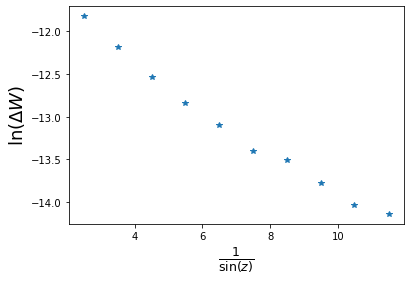

In [362]:
plt.plot(x, y, '*')
plt.xlabel(r'$\frac{1}{\sin(z)}$', fontsize=18) #Asi podemos escribir utilizando latex
plt.ylabel(r'$\ln(\Delta W)$', fontsize=18)
plt.show()

In [363]:
z = np.polyfit(x, y, 1)
z

array([ -0.25735015, -11.33526467])

In [364]:
def arreglolineal(x,y):
    z= np.polyfit(x,y,1)
    y=x*z[0]+z[1]
    return y

In [365]:
arreglolineal(x,y)

array([-11.98065841, -12.23607193, -12.49330386, -12.7501138 ,
       -13.00801875, -13.2659558 , -13.52155795, -13.78103011,
       -14.03499051, -14.29392888])

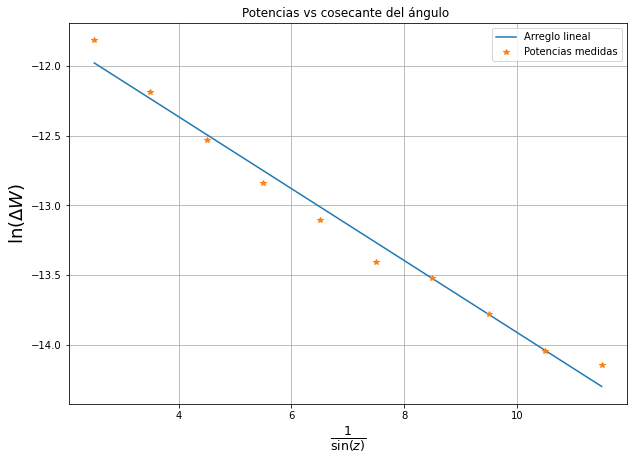

In [366]:
plt.figure(figsize=(10,7))
plt.plot(x,arreglolineal(x,y),label = 'Arreglo lineal')
plt.plot(x, y, '*',label = 'Potencias medidas')
plt.ylabel(r'$\ln(\Delta W)$', fontsize=18) #Asi podemos escribir utilizando latex
plt.xlabel(r'$\frac{1}{\sin(z)}$', fontsize=18)
plt.legend()
plt.title('Potencias vs cosecante del ángulo ')
plt.grid()
plt.savefig('grafico antenna dipping')
plt.show()

In [367]:
paths = sorted(glob.glob(r'C:\Users\Santiago Rios\OneDrive\Escritorio\experimental\tarea 1\sec_mierc_sem1_2021/'+'sdf_*'))

In [368]:
def f_gauss(x,T0,mean,stdv):
    return T0*np.exp(-((x-mean)**2)/(2*(stdv**2)))

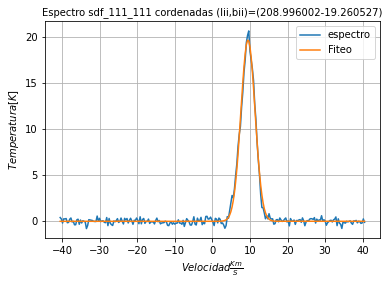

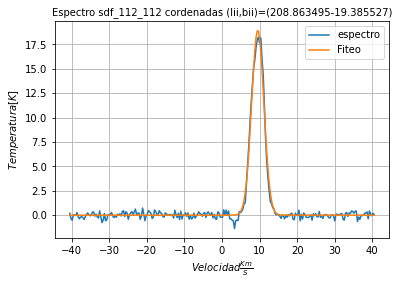

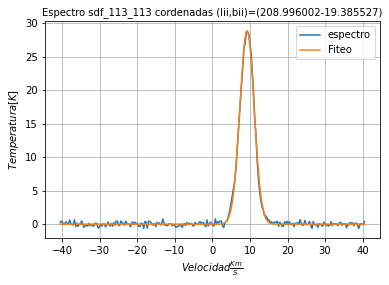

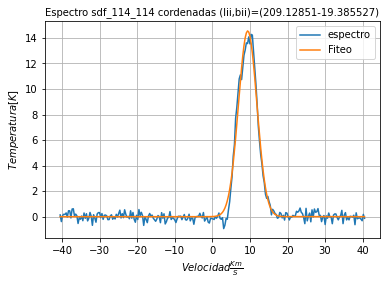

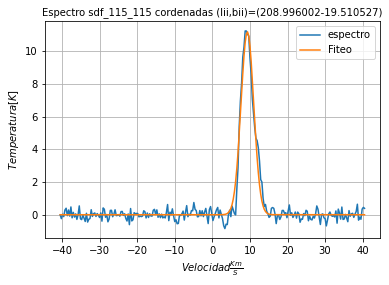

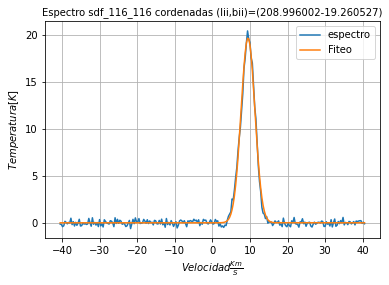

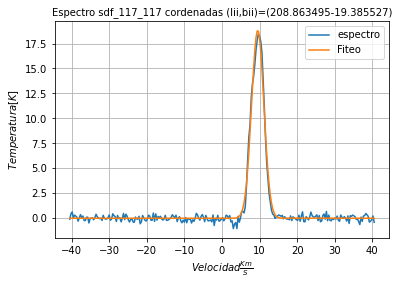

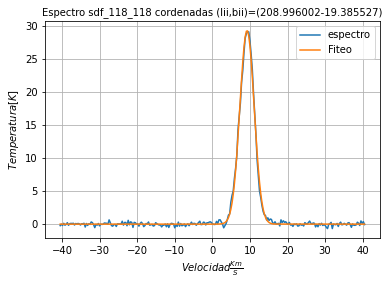

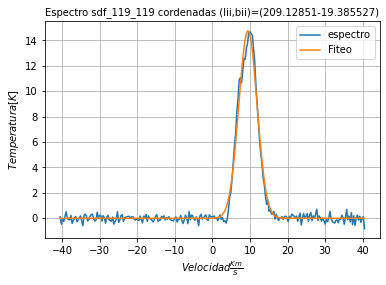

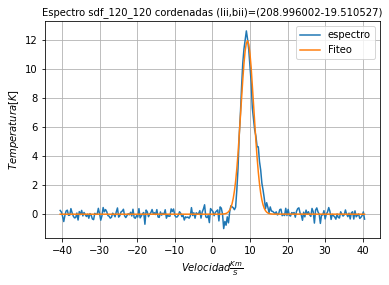

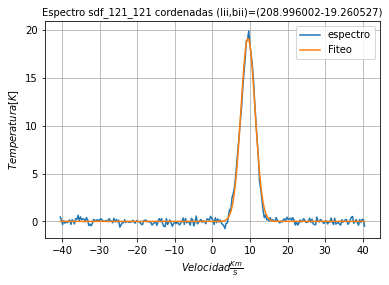

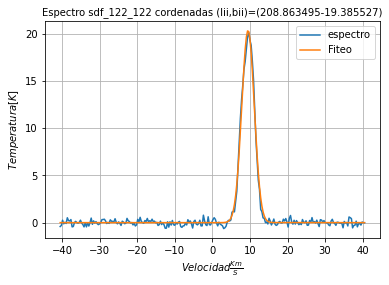

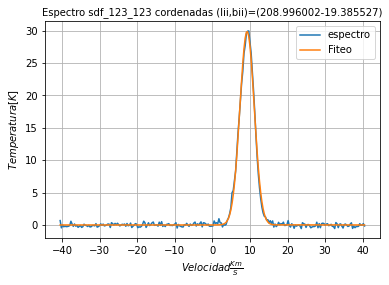

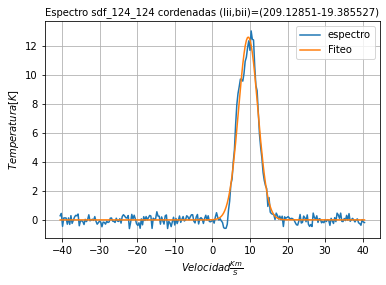

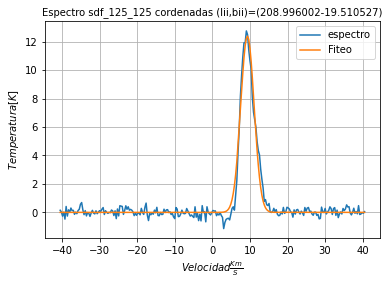

In [369]:
maximost=[]
tintegrate=[]
bii_l=[]
lii_l=[]
for i in range(len(paths)):
    file = open(paths[i])
    lines = file.readlines()
    
    lii = float(lines[22].strip()[5:])
    bii = float(lines[23].strip()[5:])
    bii_l.append(bii)
    lii_l.append(lii)
    j =paths[i][84:95]
    datos = np.genfromtxt(paths[i], unpack = True, skip_header=108)
    
    velocidades = datos[0]
    temperaturas = datos[1]
    
    plt.plot(velocidades,temperaturas,label= 'espectro')
    plt.title('Espectro '+str(j)+' cordenadas (lii,bii)=('+str(lii)+str(bii)+')',fontsize=10)
    plt.ylabel(r'$Temperatura [K]$', fontsize=10) 
    plt.xlabel(r'$Velocidad \frac{Km}{S}$', fontsize=10)
    plt.grid()
    plt.savefig('Espectro'+str(i))
    
    fg = [max(temperaturas), 10, 1] 
    coefs,cov = curve_fit(f_gauss,velocidades,temperaturas, p0=fg)
    t0,M,S = coefs[0],coefs[1],coefs[2]
    maximost.append(t0)
    
    plt.plot(velocidades,f_gauss(velocidades,t0, M,S), label='Fiteo')
    plt.title('Espectro '+str(j)+' cordenadas (lii,bii)=('+str(lii)+str(bii)+')',fontsize=10)
    plt.savefig('Espectro fiteado'+str(i))
    plt.legend()
    plt.show()
    
    tintegrate.append(np.trapz(temperaturas))
    

C:\Users\Santiago Rios\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


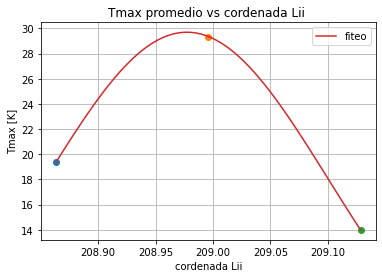

In [370]:
plt.plot(lii_l[1],maximost[1]/3+maximost[6]/3+maximost[11]/3,'o')
plt.plot(lii_l[2],maximost[2]/3+maximost[7]/3+maximost[12]/3,'o')
plt.plot(lii_l[3],maximost[3]/3+maximost[8]/3+maximost[13]/3,'o')
lii_ll=[lii_l[1],lii_l[2],lii_l[3]]
maximosts=[maximost[1]/3+maximost[6]/3+maximost[11]/3,maximost[2]/3+maximost[7]/3+maximost[12]/3,maximost[3]/3+maximost[8]/3+maximost[13]/3]

fg=[29,209,1]
val = np.linspace(lii_l[1],lii_l[3],100)
coefs,cov = curve_fit(f_gauss,lii_ll,maximosts, p0=fg)
plt.plot(val,f_gauss(val,coefs[0],coefs[1],coefs[2]),label='fiteo')
plt.legend()
plt.grid()
plt.title('Tmax promedio vs cordenada Lii ')
plt.ylabel('Tmax [K]')
plt.xlabel('cordenada Lii')
plt.savefig('Tmax vs cordenada Lii promedio')

C:\Users\Santiago Rios\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


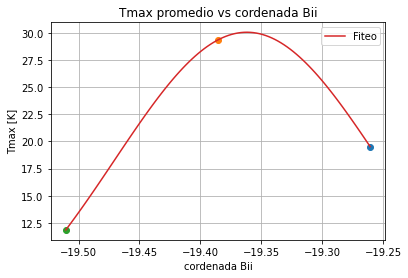

In [371]:
plt.plot(bii_l[0],maximost[0]/3+maximost[5]/3+maximost[10]/3,'o')
plt.plot(bii_l[2],maximost[2]/3+maximost[7]/3+maximost[12]/3,'o')
plt.plot(bii_l[4],maximost[4]/3+maximost[9]/3+maximost[14]/3,'o')
bii_ll=[bii_l[0],bii_l[2],bii_l[4]]
tintb =[maximost[0]/3+maximost[5]/3+maximost[10]/3,maximost[2]/3+maximost[7]/3+maximost[12]/3,maximost[4]/3+maximost[9]/3+maximost[14]/3]
fg=[400,-19.37,0.25]
val = np.linspace(bii_l[0],bii_l[4],100)
coefs,cov = curve_fit(f_gauss,bii_ll,tintb, p0=fg)
plt.plot(val,f_gauss(val,coefs[0],coefs[1],coefs[2]),label='Fiteo')
plt.legend()
plt.title('Tmax promedio vs cordenada Bii')
plt.grid()
plt.ylabel('Tmax [K]')
plt.xlabel('cordenada Bii')
plt.savefig('Tmax vs cordenada Bii promedio')

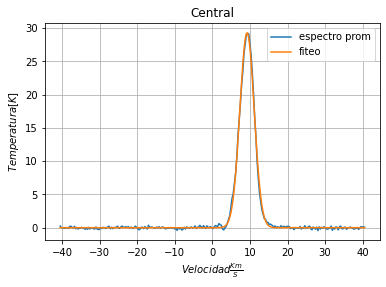

In [372]:
datos1 = np.genfromtxt(paths[2], unpack = True, skip_header=108)
datos2 = np.genfromtxt(paths[7], unpack = True, skip_header=108)
datos3 = np.genfromtxt(paths[12], unpack = True, skip_header=108)
    
temperaturas1 = datos1[1]
temperaturas2 = datos2[1]
temperaturas3 = datos3[1]

tprom= (temperaturas1+temperaturas3+temperaturas2)/3

plt.plot(velocidades,tprom,label='espectro prom')
fg1 = [max(tprom), 10, 1] 
coefs,cov = curve_fit(f_gauss,velocidades,tprom, p0=fg1)
t0,M,S = coefs[0],coefs[1],coefs[2]
plt.plot(velocidades,f_gauss(velocidades,t0,M,S),label='fiteo')
plt.ylabel(r'$Temperatura [K]$', fontsize=10) 
plt.xlabel(r'$Velocidad\frac{Km}{S}$', fontsize=10)
plt.grid()
plt.legend()
plt.title('Central')
plt.savefig('prom central')

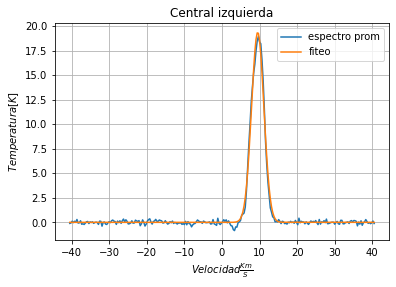

In [373]:
datos1 = np.genfromtxt(paths[1], unpack = True, skip_header=108)
datos2 = np.genfromtxt(paths[6], unpack = True, skip_header=108)
datos3 = np.genfromtxt(paths[11], unpack = True, skip_header=108)
    
temperaturas1 = datos1[1]
temperaturas2 = datos2[1]
temperaturas3 = datos3[1]

tprom= (temperaturas1+temperaturas3+temperaturas2)/3

plt.plot(velocidades,tprom,label='espectro prom')
fg1 = [max(tprom), 10, 1] 
coefs,cov = curve_fit(f_gauss,velocidades,tprom, p0=fg1)
t0,M,S = coefs[0],coefs[1],coefs[2]
plt.plot(velocidades,f_gauss(velocidades,t0,M,S),label='fiteo')
plt.ylabel(r'$Temperatura [K]$', fontsize=10) 
plt.xlabel(r'$Velocidad\frac{Km}{S}$', fontsize=10)
plt.grid()
plt.legend()
plt.title('Central izquierda')
plt.savefig('prom central izquierda')

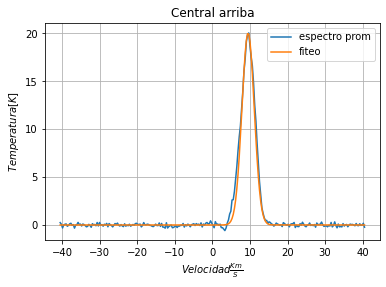

In [374]:
datos1 = np.genfromtxt(paths[0], unpack = True, skip_header=108)
datos2 = np.genfromtxt(paths[5], unpack = True, skip_header=108)
datos3 = np.genfromtxt(paths[10], unpack = True, skip_header=108)
    
temperaturas1 = datos1[1]
temperaturas2 = datos2[1]
temperaturas3 = datos3[1]


tprom= (temperaturas1+temperaturas3+temperaturas2)/3

plt.plot(velocidades,tprom,label='espectro prom')
fg1 = [max(tprom), 10, 1] 
coefs,cov = curve_fit(f_gauss,velocidades,temperaturas, p0=fg1)

plt.plot(velocidades,f_gauss(velocidades,fg1[0],M,S),label='fiteo')
plt.ylabel(r'$Temperatura [K]$', fontsize=10) 
plt.xlabel(r'$Velocidad\frac{Km}{S}$', fontsize=10)
plt.grid()
plt.legend()
plt.title('Central arriba')
plt.savefig('prom central arriba')


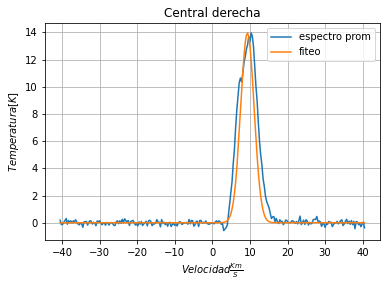

In [375]:
datos1 = np.genfromtxt(paths[3], unpack = True, skip_header=108)
datos2 = np.genfromtxt(paths[8], unpack = True, skip_header=108)
datos3 = np.genfromtxt(paths[13], unpack = True, skip_header=108)
    
temperaturas1 = datos1[1]
temperaturas2 = datos2[1]
temperaturas3 = datos3[1]

tprom= (temperaturas1+temperaturas3+temperaturas2)/3

plt.plot(velocidades,tprom,label='espectro prom')
fg1 = [max(tprom), 10, 1] 
coefs,cov = curve_fit(f_gauss,velocidades,temperaturas, p0=fg1)
t0,M,S = coefs[0],coefs[1],coefs[2]
plt.plot(velocidades,f_gauss(velocidades,fg1[0],M,S),label='fiteo')
plt.ylabel(r'$Temperatura [K]$', fontsize=10) 
plt.xlabel(r'$Velocidad\frac{Km}{S}$', fontsize=10)
plt.grid()
plt.legend()
plt.title('Central derecha')
plt.savefig('prom central derecha')

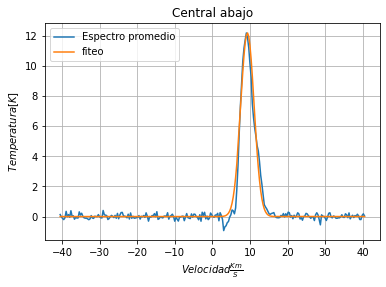

In [376]:
datos1 = np.genfromtxt(paths[4], unpack = True, skip_header=108)
datos2 = np.genfromtxt(paths[9], unpack = True, skip_header=108)
datos3 = np.genfromtxt(paths[14], unpack = True, skip_header=108)
    
temperaturas1 = datos1[1]
temperaturas2 = datos2[1]
temperaturas3 = datos3[1]

tprom= (temperaturas1+temperaturas3+temperaturas2)/3

plt.plot(velocidades,tprom,label='Espectro promedio')
fg1 = [max(tprom), 10, 1] 
coefs,cov = curve_fit(f_gauss,velocidades,temperaturas, p0=fg1)
t0,M,S = coefs[0],coefs[1],coefs[2]
plt.plot(velocidades,f_gauss(velocidades,fg1[0],M,S),label='fiteo')
plt.ylabel(r'$Temperatura [K]$', fontsize=10) 
plt.xlabel(r'$Velocidad\frac{Km}{S}$', fontsize=10)
plt.grid()
plt.legend()
plt.title('Central abajo')
plt.savefig('prom central abajo')

C:\Users\Santiago Rios\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


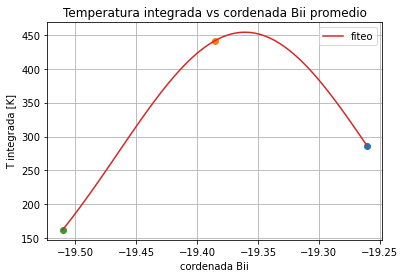

In [377]:
plt.plot(bii_l[0],tintegrate[0]/3+tintegrate[5]/3+tintegrate[10]/3,'o')
plt.plot(bii_l[2],tintegrate[2]/3+tintegrate[7]/3+tintegrate[12]/3,'o')
plt.plot(bii_l[4],tintegrate[4]/3+tintegrate[9]/3+tintegrate[14]/3,'o')
bii_ll=[bii_l[0],bii_l[2],bii_l[4]]
tintb =[tintegrate[0]/3+tintegrate[5]/3+tintegrate[10]/3,tintegrate[2]/3+tintegrate[7]/3+tintegrate[12]/3,tintegrate[4]/3+tintegrate[9]/3+tintegrate[14]/3]
fg=[400,-19.37,0.25]
val = np.linspace(bii_l[0],bii_l[4],100)
coefs,cov = curve_fit(f_gauss,bii_ll,tintb, p0=fg)
plt.plot(val,f_gauss(val,coefs[0],coefs[1],coefs[2]),label='fiteo')
plt.legend()
plt.title('Temperatura integrada vs cordenada Bii promedio')
plt.grid()
plt.ylabel('T integrada [K]')
plt.xlabel('cordenada Bii')
plt.savefig('Temperatura integrada vs cordenada Bii promedio')


C:\Users\Santiago Rios\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


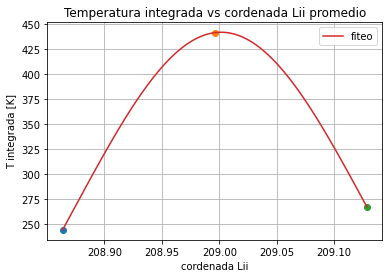

In [378]:
plt.plot(lii_l[1],tintegrate[1]/3+tintegrate[6]/3+tintegrate[11]/3,'o')
plt.plot(lii_l[2],tintegrate[2]/3+tintegrate[7]/3+tintegrate[12]/3,'o')
plt.plot(lii_l[3],tintegrate[3]/3+tintegrate[8]/3+tintegrate[13]/3,'o')


lii_ll=[lii_l[1],lii_l[2],lii_l[3]]
tint=[tintegrate[1]/3+tintegrate[6]/3+tintegrate[11]/3,tintegrate[2]/3+tintegrate[7]/3+tintegrate[12]/3,tintegrate[3]/3+tintegrate[8]/3+tintegrate[13]/3]

fg=[450,209,1]
val = np.linspace(lii_l[1],lii_l[3],100)
coefs,cov = curve_fit(f_gauss,lii_ll,tint, p0=fg)
plt.plot(val,f_gauss(val,coefs[0],coefs[1],coefs[2]),label='fiteo')
plt.legend()
plt.title('Temperatura integrada vs cordenada Lii promedio')
plt.grid()
plt.ylabel('T integrada [K]')
plt.xlabel('cordenada Lii')
plt.savefig('Temperatura integrada vs cordenada Lii promedio')

In [392]:
def error(T_array):
    errores_array = T_array[np.where(T_array<1.5)]
    output = np.sqrt(np.mean(errores_array**2))
    return output


0.28735905670051737


In [415]:
datos1 = np.genfromtxt(paths[2], unpack = True, skip_header=108)
datos2 = np.genfromtxt(paths[7], unpack = True, skip_header=108)
datos3 = np.genfromtxt(paths[12], unpack = True, skip_header=108)
    
temperaturas1 = datos1[1]
temperaturas2 = datos2[1]
temperaturas3 = datos3[1]

tprom= (temperaturas1+temperaturas3+temperaturas2)/3
a=error(tprom)
print(a)

0.24409201522023027


In [424]:
b=error(temperaturas1)/2.5
print(b)

0.1313716321238046


In [425]:
b/a

0.5382053649123896

In [413]:
1/np.sqrt(3)

0.5773502691896258